# Correlation and Preambles
We will explore how nodes can listen for a specific preamble to achieve time synchronization.

In [10]:
from matplotlib import pyplot as plt
import numpy as np


### Problem 2.1: Autocorrelation 
The autocorrelation of a signal $x$ is the correlation of $x$ with itself. For a uniform random signal $x$ think about what the autocorrelation would look like.

- **Plot the signal and its autocorrelation. Use `numpy.correlate` with `mode='full'`, and plot the absolute value of the autocorrelation.**

In [3]:
X_len = 1000
X = numpy.random.random(X_len) + 1j * numpy.random.random(X_len)

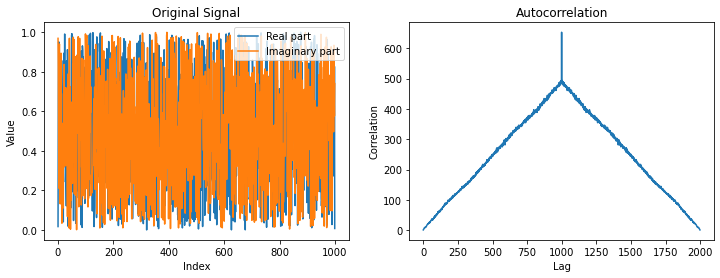

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal
X_len = 1000
X = np.random.random(X_len) + 1j * np.random.random(X_len)

# Plot the signal
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(np.real(X), label='Real part')
plt.plot(np.imag(X), label='Imaginary part')
plt.title('Original Signal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Calculate the autocorrelation
autocorr = np.correlate(X, X, mode='full')

# Plot the autocorrelation
plt.subplot(1, 2, 2)
plt.plot(np.abs(autocorr))
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Correlation')
#plt.tight_layout()
plt.show()

### Problem 2.2: Preamble detection using correlation
Implement preamble detection and synchronization using the correlation.

- **Fill in the `detect_preamble` function below. The function should take two signals and return `None` if the preamble is not found, otherwise it should return the index where the preamble starts.**

In [102]:
# Compare the correlation magnitude against this value to determine whether there is a preamble or not
threshold = 100
def detect_preamble(preamble, signal):
    corr = np.correlate(signal, preamble, mode='valid')
    maximum = 0
    ind = 0
    flag = False
    for i in range(len(corr)):
        if (np.abs(corr[i]) > threshold):
            flag = True
            if (np.abs(corr[i]) > maximum):
                maximum = np.abs(corr[i])
                ind = i
    if flag:
        return ind
    return None

In [104]:
# This cell will test your implementation of `detect_preamble`
preamble_length = 100
signal_length = 1000
preamble = (numpy.random.random(preamble_length) + 1j * numpy.random.random(preamble_length))
signalA = numpy.random.random(signal_length) + 1j * numpy.random.random(signal_length)
signalB = numpy.random.random(signal_length) + 1j * numpy.random.random(signal_length)
preamble_start_idx = 123
signalB[preamble_start_idx:preamble_start_idx + preamble_length] += preamble

numpy.testing.assert_equal(detect_preamble(preamble, signalA), None)
numpy.testing.assert_equal(detect_preamble(preamble, signalB), preamble_start_idx)